In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>''')

# Tests for Parameter Sampling

In order to test changes made to off rate fitting this document can serve as a standard. Here, off-rate data is simulated for various parameter combinations, fits are performed and the resulting parameter space sweep is analysed.

In [1]:
import numpy
import sys
import time
from matplotlib import pyplot as plt
sys.path.append('/Users/hubatsl/Desktop/SPT/Us/SPT/Python/src')
from MovieTracks import ParameterSampler
%matplotlib inline

In [2]:
import numpy
from MovieTracks import ParameterSampler
#Get noise value
noise = numpy.array([0.1])
#For each noise value run the following param combinations
offRate = numpy.arange(0.01, 0.02, 0.01)
kOn = numpy.arange(100, 200, 100)
kPh = numpy.arange(0.01, 0.02, 0.01)
#Do the sampling
p = ParameterSampler(offRate, kPh, kOn, noise, '1')

**Analyse Cluster Output**

In [4]:
import pandas as pd
import glob
import numpy
#Concatenate all input/output files into one Pandas frame
allFilesIn = glob.glob("offRate_Simulation_16_10_16/" + "/in*.csv")
df_from_each_file = (pd.read_csv(f) for f in allFilesIn)
concatenated_dfIn   = pd.concat(df_from_each_file, ignore_index=True)
allFilesOut = glob.glob("offRate_Simulation_16_10_16/" + "/out*.csv")
df_from_each_file = (pd.read_csv(f) for f in allFilesOut)
concatenated_dfOut   = pd.concat(df_from_each_file, ignore_index=True)

# Calculate errors for each method by dividing the fitted off rate by 
# the true input
# Get Off Rates and Bleaching rates in seperate dataframes
dfOffRate = concatenated_dfOut[['kOffVar1', 'kOffVar2', 'kOffVar3', 'kOffVar4', 'kOffVar5', 'kOffVar6']]
dfPhRate = concatenated_dfOut[['kPhVar1', 'kPhVar5', 'kPhVar6']]
dfOffRateErr = (dfOffRate.T/concatenated_dfIn.values[:, 1]).T
dfPhRateErr = (dfPhRate.T/concatenated_dfIn.values[:, 2]).T

In [5]:
# dfPhRate.ix[(dfPhRateErr.kPhVar1>10)]
idx = 57809
print(concatenated_dfOut.ix[idx])
print(dfPhRateErr.ix[idx])
print(concatenated_dfIn.ix[idx, :])

Unnamed: 0      0.000000
kOffVar1      715.407863
kOffVar2        0.000163
kOffVar3        0.000688
kOffVar4       -0.000135
kOffVar5       28.524936
kOffVar6        0.000224
kPhVar1       237.121428
kPhVar5        -3.879203
kPhVar6         0.000359
kOnVar5        -0.001493
kOnVar6         0.000138
Name: 57809, dtype: float64
kPhVar1    474242.855010
kPhVar5     -7758.405965
kPhVar6         0.717175
Name: 57809, dtype: float64
Unnamed: 0      0.0000
kOff            0.0005
kPh             0.0005
kOn           600.0000
noise           1.0000
Name: 57809, dtype: float64


/Users/hubatsl/anaconda/envs/python3Conda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/Users/hubatsl/anaconda/envs/python3Conda/lib/python3.5/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


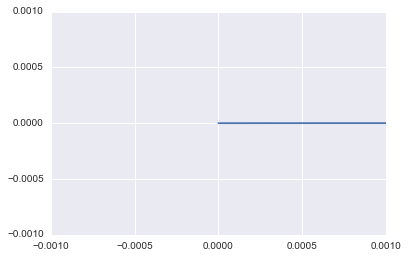

<function __main__.plotErrXmax>

In [6]:
from IPython.html.widgets import interact, FloatSlider
x_min_widget = FloatSlider(min=0.0, max=600000.0, step=1000)
x_max_widget = FloatSlider(min=0.0, max=600000.0, step=1000)
y_min_widget = FloatSlider(min=-10, max=10, step=0.5)
y_max_widget = FloatSlider(min=-10, max=10, step=0.5)

def plotErrXmax(xmin, xmax, ymin, ymax):
    plt.plot(dfOffRateErr.kOffVar6)
    plt.xlim((xmin, xmax))
    plt.ylim((ymin, ymax))
    plt.show()

interact(plotErrXmax, xmin=x_min_widget, xmax=x_max_widget, ymin=y_min_widget, ymax=y_max_widget)